In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [8]:

# Load your dataset
data = pd.read_csv('final_dataset.csv')

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [9]:
# Select features for clustering
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
             'Tool wear [min]', 'Vibration (mm/s)', 'Pressure (Pa)']  # Example features




In [10]:
# Extract features
X = data[features]

# Normalize/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# DBSCAN parameters
epsilon = 0.5  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # Minimum number of samples in a neighborhood to be a core point

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters


In [12]:
# Unique cluster labels
unique_labels = np.unique(clusters)
print(f'Unique Labels: {unique_labels}')

# Filter anomalies (label -1 is used for outliers in DBSCAN)
anomalies = data[data['Cluster'] == -1]

print('Anomalies:')
print(anomalies)


Unique Labels: [-1]
Anomalies:
      UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0       1     M14860    M                298.1                    308.6   
1       2     L47181    L                298.2                    308.7   
2       3     L47182    L                298.1                    308.5   
3       4     L47183    L                298.2                    308.6   
4       5     L47184    L                298.2                    308.7   
..    ...        ...  ...                  ...                      ...   
995   996     L48175    L                296.3                    307.3   
996   997     M15856    M                296.3                    307.2   
997   998     M15857    M                296.3                    307.2   
998   999     M15858    M                296.4                    307.2   
999  1000     L48179    L                296.3                    307.1   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \

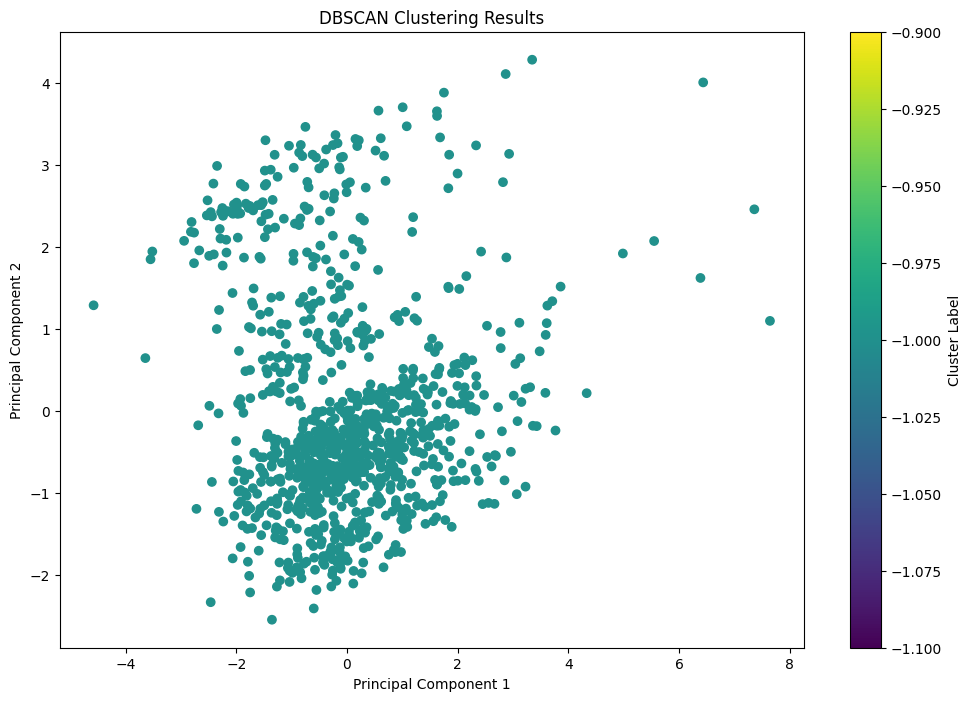

In [13]:
# Optional: Reduce dimensionality for visualization (if you have more than 2 features)
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.colorbar(label='Cluster Label')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Save the DataFrame with clustering results to a new CSV file
output_file = 'C:/Users/manis/OneDrive/Desktop/HACKERA/dbscan_results.csv'
data.to_csv(output_file, index=False)


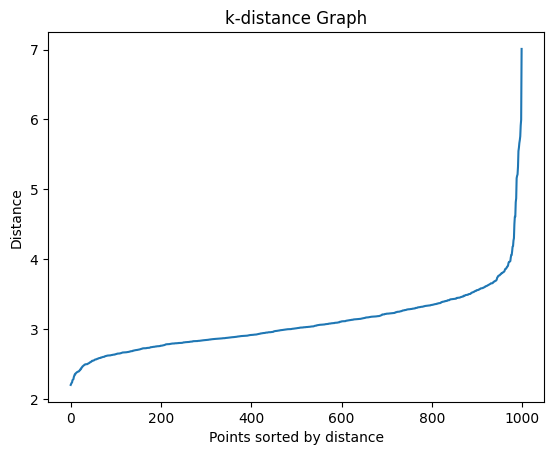

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Compute the k-distance graph
k = 5  # You can adjust this
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance')
plt.title('k-distance Graph')
plt.show()


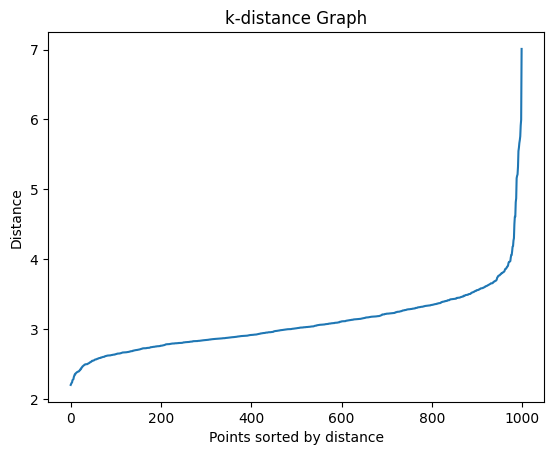

Number of clusters found: 0
Number of outliers detected: 1000


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Compute the k-distance graph
k = 5  # Adjust this value if needed
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance')
plt.title('k-distance Graph')
plt.show()

# Adjust these values based on the k-distance graph
eps_value = 0.5  # Start with a different value if necessary
min_samples_value = 10  # Start with a different value if necessary

# Apply DBSCAN with the adjusted parameters
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Save the DataFrame with clustering results to a new CSV file
output_file = 'C:/Users/manis/OneDrive/Desktop/HACKERA/dbscan_results.csv'
data.to_csv(output_file, index=False)

# Display the number of clusters and outliers
print(f'Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}')
print(f'Number of outliers detected: {list(clusters).count(-1)}')
